## Install necessary libraries

In [1]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!pip install -e detectron2
!pip install -e /content/detectron2_repo/projects/TensorMask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e8f65c489eb82471e70b138958ffacec4ac5fbe6cb8786443a53c65a67b233ca
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15069, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 15069 (delta 44), reused 74 (delta 38), pack-reused 14975
Receiving objects: 100% (15069/15069), 6.14 MiB | 15.22 MiB/s, done.
Resolving deltas: 100% (10902/10902), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadat

ERROR: detectron2 is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo/projects/TensorMask
  Preparing metadata (setup.py) ... done
  Running setup.py develop for tensormask


## Import Libraries

In [3]:
import detectron2, cv2, random
import os, json, itertools
import numpy as np
import torch, torchvision
from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from google.colab.patches import cv2_imshow
from PIL import Image


from tensormask import add_tensormask_config

## Prepering Train and Validation Dataset

In [ ]:
register_coco_instances("poly_train", {}, "/content/Instanse-seg-Cat-&-Dog-5/train/_annotations.coco.json", 
                        "/content/Instanse-seg-Cat-&-Dog-5/train")

register_coco_instances("poly_valid", {}, "/content/Instanse-seg-Cat-&-Dog-5/valid/_annotations.coco.json", 
                        "/content/Instanse-seg-Cat-&-Dog-5/valid")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



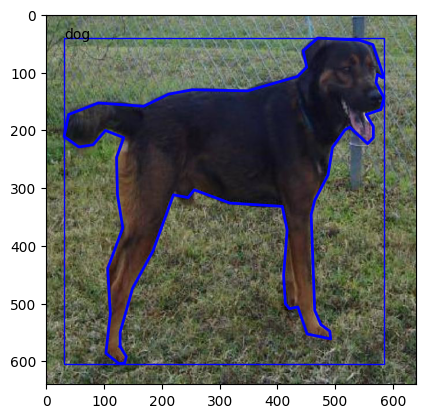

In [6]:
dataset_train = DatasetCatalog.get("poly_train")
fig, ax = plt.subplots()
dataset_dict = random.choice(dataset_train)
im = Image.open(dataset_dict['file_name'])
ax.imshow(im)
for ann in dataset_dict['annotations']:
    # write a text about bbox
    plt.text(ann['bbox'][0], ann['bbox'][1],
             'cat' if ann['category_id']==1 else "dog")
    # draw a about bbox
    rect = patches.Rectangle((ann['bbox'][0], ann['bbox'][1]), ann['bbox'][2], ann['bbox'][3],
                             linewidth=1, edgecolor='r' if ann['category_id']==1 else "b", facecolor='none')
    ax.add_patch(rect)

    # draw segmentations
    for poly in ann['segmentation']:
        x = poly[0::2]
        y = poly[1::2]
        ax.plot(x,y, linewidth=2, color='r' if ann['category_id']==1 else "b")

## Setting model configs and train the model

In [7]:
# Set the training Configs
cfg = get_cfg()
add_tensormask_config(cfg) 
cfg.merge_from_file("/content/detectron2_repo/projects/TensorMask/configs/tensormask_R_50_FPN_1x.yaml")
cfg.DATASETS.TRAIN = ("poly_train",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://TensorMask/tensormask_R_50_FPN_1x/152549419/model_final_8f325c.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0005
cfg.SOLVER.MAX_ITER = 2000    # 2000 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # only has one class (cat & dog) + 1
cfg.TEST.DETECTIONS_PER_IMAGE = 5

In [8]:
# Trainer
os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume = False)
trainer.train()


[06/01 16:03:04 d2.engine.defaults]: Model:
TensorMask(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)


[06/01 16:03:27 d2.utils.events]:  eta: 0:32:36  iter: 19  total_loss: 1.892  loss_cls: 1.378  loss_box_reg: 0.1337  loss_mask: 0.4224    time: 1.0910  last_time: 0.9865  data_time: 0.0189  last_data_time: 0.0047   lr: 9.9905e-06  max_mem: 3914M
[06/01 16:03:50 d2.utils.events]:  eta: 0:32:59  iter: 39  total_loss: 1.787  loss_cls: 1.287  loss_box_reg: 0.1419  loss_mask: 0.2729    time: 1.0569  last_time: 1.0424  data_time: 0.0125  last_data_time: 0.0237   lr: 1.998e-05  max_mem: 3914M
[06/01 16:04:11 d2.utils.events]:  eta: 0:33:00  iter: 59  total_loss: 1.525  loss_cls: 1.099  loss_box_reg: 0.1319  loss_mask: 0.2883    time: 1.0491  last_time: 1.0344  data_time: 0.0105  last_data_time: 0.0095   lr: 2.997e-05  max_mem: 3914M
[06/01 16:04:32 d2.utils.events]:  eta: 0:32:59  iter: 79  total_loss: 1.288  loss_cls: 0.8782  loss_box_reg: 0.1126  loss_mask: 0.2697    time: 1.0483  last_time: 1.0423  data_time: 0.0121  last_data_time: 0.0277   lr: 3.9961e-05  max_mem: 3914M
[06/01 16:04:52 d

In [9]:
# Save model for testing
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set the testing threshold for this model
cfg.DATASETS.TEST = ("poly_valid", )
predictor = DefaultPredictor(cfg)


[06/01 16:39:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


## Validating the model

WARNING [06/01 16:44:09 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/01 16:44:09 d2.data.datasets.coco]: Loaded 55 images in COCO format from /content/Instanse-seg-Cat-&-Dog-5/valid/_annotations.coco.json


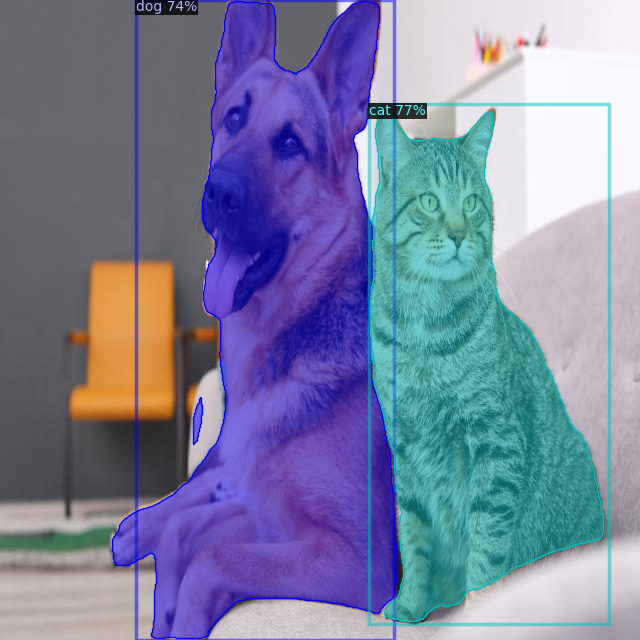

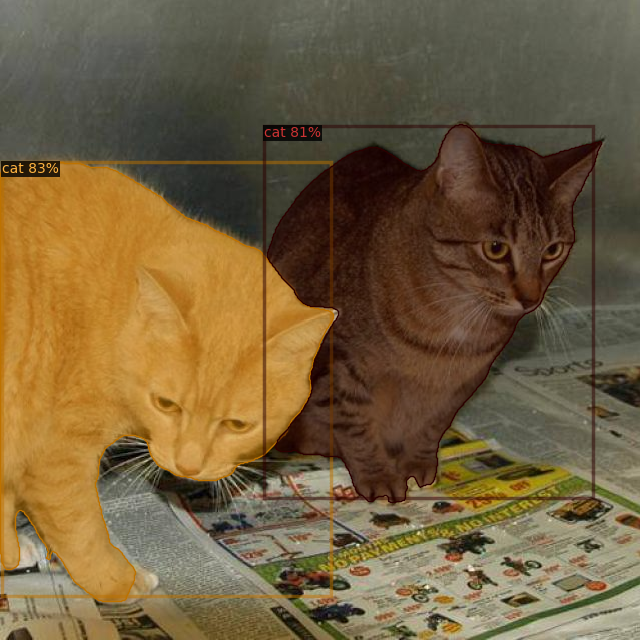

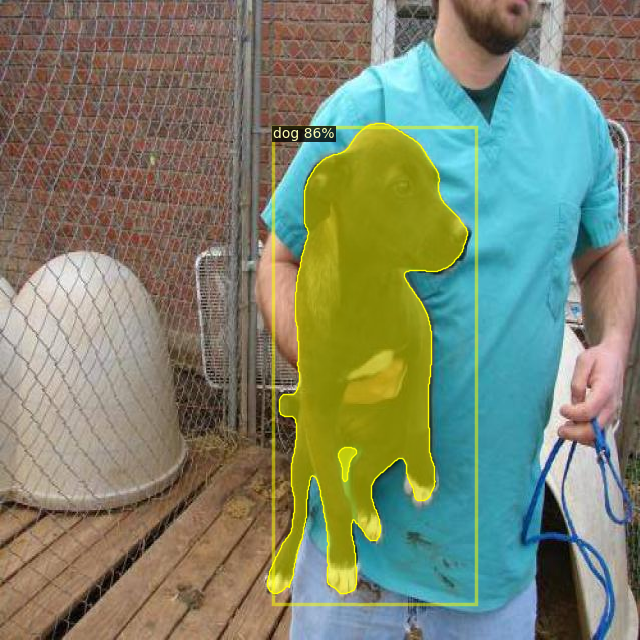

In [18]:
dataset_dicts = DatasetCatalog.get("poly_valid")
for d in random.sample(dataset_dicts, 3):
    image = cv2.imread(d["file_name"])    
    # Assuming you have already performed inference and obtained the predictions
    outputs = predictor(image)

    # Filter predictions based on confidence score
    instances = outputs["instances"]
    scores = instances.scores
    keep_indices = scores > 0.6  # Set the desired confidence threshold
    filtered_instances = instances[keep_indices]

    # Visualize the filtered predictions
    metadata = MetadataCatalog.get(predictor.cfg.DATASETS.TEST[0])  # Assuming single dataset
    v = Visualizer(image, metadata)
    v = v.draw_instance_predictions(filtered_instances.to("cpu"))
    vis_image = v.get_image()

    # Display or save the visualization
    cv2_imshow(vis_image)